In [10]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
df = pd.read_csv('temp_signal.csv')

In [24]:
df

,BatchNo,Temperature
0,2019-08-23,100.200000
1,2019-08-23,96.222222
2,2019-08-23,96.615385
3,2019-08-23,94.538462
4,2019-08-23,91.642857
...,...,...
6963,2019-10-15,96.000000
6964,2019-10-15,95.000000
6965,2019-10-15,96.785714
6966,2019-10-15,97.222222


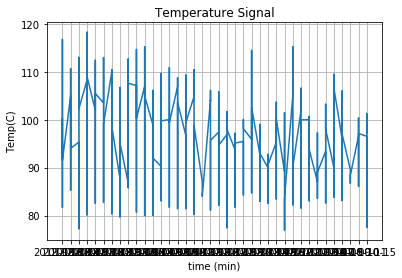

In [27]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
ax.plot(df.BatchNo, df.Temperature)

ax.set(xlabel='time (min)', ylabel='Temp(C)',
       title='Temperature Signal')
ax.grid()

fig.savefig("Raw Temperature Signal.png")
plt.show()

In [31]:
import datetime
import numpy as np
import scipy as sp
import scipy.fftpack
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [37]:
temp_fft = sp.fftpack.fft(df.Temperature.values)
temp_fft

array([ 6.85927908e+05    -0.j        ,  2.38886271e+03-13094.02564232j,
        4.80941968e+02 -4487.2083989j , ...,
       -1.21525099e+03 +2966.85204562j,  4.80941968e+02 +4487.2083989j ,
        2.38886271e+03+13094.02564232j])

In [39]:
temp_psd = np.abs(temp_fft)**2

In [40]:
fftfreq = sp.fftpack.fftfreq(len(temp_psd), 1. / 69120 )

In [41]:
i = fftfreq > 0

Text(0, 0.5, 'PSD (dB)')

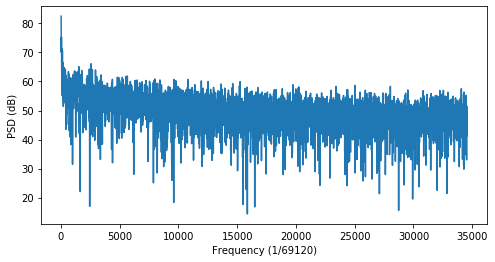

In [43]:
fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]))
# ax.set_xlim(0, 1000)
ax.set_xlabel('Frequency (1/69120)')
ax.set_ylabel('PSD (dB)')

Text(0.5, 1.0, 'Power Spectral Density of the Temperature Signal')

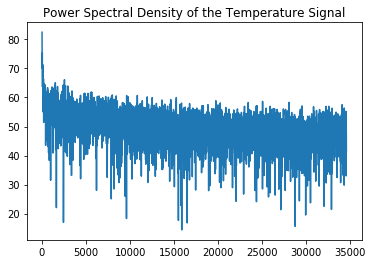

In [56]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes()

ax.plot(fftfreq[i], 10 * np.log10(temp_psd[i]));
ax.set_title('Power Spectral Density of the Temperature Signal')

In [60]:
max(10 * np.log10(temp_psd[i]))


82.48366094664667

In [67]:
temp_fft_bis = oil_fft.copy()
temp_fft_bis[np.abs(fftfreq) > max(10 * np.log10(temp_psd[i]))] = 0
# len(oil_avg)

In [68]:
date = df['BatchNo']
# date = date.drop_duplicates()

[Text(0, 0.5, 'Temp(C)'),
 Text(0.5, 0, 'time (min)'),
 Text(0.5, 1.0, 'Temperature Signal - Fourier Processed')]

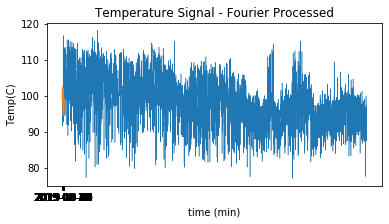

In [76]:
temp_slow = np.real(sp.fftpack.ifft(temp_fft_bis))
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
df.Temperature.plot(ax=ax, lw=.5)
ax.plot_date(date, temp_slow, '-')
# ax.set_xlim(datetime.date(1994, 1, 1),
#             datetime.date(2000, 1, 1))
# ax.set_ylim(-10, 40)
ax.set(xlabel='time (min)', ylabel='Temp(C)',
       title='Temperature Signal - Fourier Processed')
# ax.plot(df.BatchNo, df.Temperature)
